## 1. Import Required Libraries

Importando as bibliotecas necessárias para análise de dados e visualização.

## 2. Load and Explore Data

Carregando e explorando a estrutura dos dados do arquivo CSV.

In [29]:
# Carregar os dados
df = pd.read_csv(data_path)

print("Dados carregados com sucesso!")
print(f"\nDimensões do dataset: {df.shape}")
print(f"\nColunas disponíveis:")
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

Bibliotecas importadas com sucesso!


## 3. Data Preprocessing

Limpeza e preparação dos dados para análise.

In [30]:
# Verificar tipos de dados da coluna max_magnitude
print("Tipo de dados da coluna max_magnitude:")
if 'max_magnitude' in df.columns:
    print(f"max_magnitude: {df['max_magnitude'].dtype}")
    
    # Garantir que a coluna é numérica
    df['max_magnitude'] = pd.to_numeric(df['max_magnitude'], errors='coerce')
    
    print("\nColuna max_magnitude convertida para formato numérico.")
    print(f"Valores nulos após conversão: {df['max_magnitude'].isnull().sum()}")
else:
    print("Coluna 'max_magnitude' não encontrada no dataset!")
    print("Colunas disponíveis:")
    for col in df.columns:
        print(f"  - {col}")

Arquivo encontrado: resultados_csv/eventsA001_cut25seg_results.csv


In [31]:
# Análise da coluna max_magnitude
if 'max_magnitude' in df.columns:
    print("Análise de max_magnitude realizada com sucesso!")
    print(f"\nPrimeiros valores de max_magnitude:")
    display(df[['event_id', 'canal', 'sensor', 'max_magnitude']].head(10))
    
    # Verificar valores válidos
    valid_amplitudes = df['max_magnitude'].notna()
    print(f"\nRegistros com max_magnitude válida: {valid_amplitudes.sum()}")
    print(f"Registros com max_magnitude nula: {(~valid_amplitudes).sum()}")
else:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
    print("Continuando análise sem esta coluna...")

Dados carregados com sucesso!

Dimensões do dataset: (5353, 8)

Colunas disponíveis:
1. event_id
2. canal
3. max_magnitude
4. sensor
5. x_amplitude
6. y_amplitude
7. z_amplitude
8. source_file


## 5. Max Amplitude Analysis by Canal

Análise de frequência das magnitudes da coluna `max_magnitude` agrupada por canal (G, H, E) para identificar distribuição de magnitudes e padrões por canal.

In [19]:
# Análise de frequência das magnitudes por canal
print("ANÁLISE DE FREQUÊNCIA DAS MAGNITUDES POR CANAL:")
print("=" * 55)

if 'max_magnitude' not in df.columns:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
else:
    # Função para criar intervalos de amplitude
    def create_amplitude_intervals(amplitude_series, n_intervals=10):
        """Cria intervalos de amplitude com número especificado de intervalos"""
        min_amp = amplitude_series.min()
        max_amp = amplitude_series.max()
        
        # Criar intervalos lineares
        bins = np.linspace(min_amp, max_amp, n_intervals + 1)
        return bins
    
    canais = df['canal'].unique()
    
    print(f"Canais analisados: {list(canais)}")
    print(f"Coluna analisada: max_magnitude")
    
    # Análise de frequência para max_magnitude
    print(f"\n{'-'*60}")
    print(f"ANÁLISE DE FREQUÊNCIA - max_magnitude")
    print(f"{'-'*60}")
    
    for canal in canais:
        canal_data = df[df['canal'] == canal]['max_magnitude'].dropna()
        
        if len(canal_data) > 0:
            # Calcular range dos dados
            data_range = canal_data.max() - canal_data.min()
            
            # Número adaptativo de intervalos baseado na quantidade de dados
            if len(canal_data) < 50:
                n_intervals = 5
            elif len(canal_data) < 200:
                n_intervals = 10
            else:
                n_intervals = 15
            
            bins = create_amplitude_intervals(canal_data, n_intervals)
            
            # Criar histograma
            counts, bin_edges = np.histogram(canal_data, bins=bins)
            
            print(f"\nCanal {canal}:")
            print(f"  Range: {canal_data.min():.6e} a {canal_data.max():.6e}")
            print(f"  Registros válidos: {len(canal_data)}")
            print(f"  Número de intervalos: {len(counts)}")
            print(f"  Distribuição de frequências:")
            
            for i, (count, start, end) in enumerate(zip(counts, bin_edges[:-1], bin_edges[1:])):
                percentage = (count / len(canal_data)) * 100
                print(f"    Intervalo {i+1}: [{start:.6e} - {end:.6e}): {count} ({percentage:.1f}%)")
        else:
            print(f"\nCanal {canal}: Sem dados válidos de max_magnitude")
    
    # Análise de percentis por canal
    print(f"\n{'='*70}")
    print("DISTRIBUIÇÃO POR PERCENTIS - max_magnitude:")
    print(f"{'='*70}")
    
    for canal in canais:
        canal_data = df[df['canal'] == canal]['max_magnitude'].dropna()
        
        if len(canal_data) > 0:
            # Calcular percentis
            percentiles = [0, 10, 25, 50, 75, 90, 95, 99, 100]
            percentile_values = np.percentile(canal_data, percentiles)
            
            print(f"\nCanal {canal} - Distribuição por percentis:")
            for p, val in zip(percentiles, percentile_values):
                print(f"    P{p:2d}: {val:.6e}")
            
            # Contar ocorrências em intervalos baseados em quartis
            q1 = np.percentile(canal_data, 25)
            q2 = np.percentile(canal_data, 50)
            q3 = np.percentile(canal_data, 75)
            
            count_q1 = (canal_data <= q1).sum()
            count_q2 = ((canal_data > q1) & (canal_data <= q2)).sum()
            count_q3 = ((canal_data > q2) & (canal_data <= q3)).sum()
            count_q4 = (canal_data > q3).sum()
            
            print(f"    Distribuição por quartis:")
            print(f"      Q1 (≤{q1:.6e}): {count_q1} ({(count_q1/len(canal_data)*100):.1f}%)")
            print(f"      Q2 ({q1:.6e} - {q2:.6e}]: {count_q2} ({(count_q2/len(canal_data)*100):.1f}%)")
            print(f"      Q3 ({q2:.6e} - {q3:.6e}]: {count_q3} ({(count_q3/len(canal_data)*100):.1f}%)")
            print(f"      Q4 (>{q3:.6e}): {count_q4} ({(count_q4/len(canal_data)*100):.1f}%)")
        else:
            print(f"\nCanal {canal}: Sem dados válidos para análise de percentis")

ANÁLISE DE FREQUÊNCIA DAS MAGNITUDES POR CANAL:
Canais analisados: ['Canal_E', 'Canal_G', 'Canal_H']
Coluna analisada: max_magnitude

------------------------------------------------------------
ANÁLISE DE FREQUÊNCIA - max_magnitude
------------------------------------------------------------

Canal Canal_E:
  Range: 3.879348e-06 a 9.973046e-05
  Registros válidos: 1221
  Número de intervalos: 15
  Distribuição de frequências:
    Intervalo 1: [3.879348e-06 - 1.026942e-05): 1040 (85.2%)
    Intervalo 2: [1.026942e-05 - 1.665950e-05): 138 (11.3%)
    Intervalo 3: [1.665950e-05 - 2.304957e-05): 18 (1.5%)
    Intervalo 4: [2.304957e-05 - 2.943965e-05): 8 (0.7%)
    Intervalo 5: [2.943965e-05 - 3.582972e-05): 3 (0.2%)
    Intervalo 6: [3.582972e-05 - 4.221979e-05): 2 (0.2%)
    Intervalo 7: [4.221979e-05 - 4.860987e-05): 1 (0.1%)
    Intervalo 8: [4.860987e-05 - 5.499994e-05): 3 (0.2%)
    Intervalo 9: [5.499994e-05 - 6.139002e-05): 1 (0.1%)
    Intervalo 10: [6.139002e-05 - 6.778009e-05):

## 6. Statistical Summary

Resumo estatístico completo da max_magnitude.

In [84]:
# Análise comparativa de eventos por max_magnitude
print("\nANÁLISE COMPARATIVA DE EVENTOS - max_magnitude:")
print("-" * 45)

if 'max_magnitude' in df.columns:
    # Filtrar dados válidos
    valid_amplitude_df = df.dropna(subset=['max_magnitude'])
    
    if len(valid_amplitude_df) > 0:
        # Classificar eventos por nível de amplitude
        amplitude_means = valid_amplitude_df.groupby('event_id')['max_magnitude'].mean()
        low_amplitude_threshold = amplitude_means.quantile(0.33)
        high_amplitude_threshold = amplitude_means.quantile(0.67)
        
        def classify_amplitude(mean_amplitude):
            if mean_amplitude <= low_amplitude_threshold:
                return 'Baixa'
            elif mean_amplitude <= high_amplitude_threshold:
                return 'Média'
            else:
                return 'Alta'
        
        amplitude_classification = amplitude_means.apply(classify_amplitude)
        
        event_comparison = valid_amplitude_df.groupby('event_id').agg({
            'max_magnitude': ['count', 'mean', 'std'],
            'sensor': 'nunique',
            'canal': 'nunique'
        }).round(6)
        
        event_comparison.columns = ['Registros', 'Amplitude_Média', 'Desvio_Padrão', 'Sensores_Únicos', 'Canais_Únicos']
        event_comparison['Classificacao_Amplitude'] = amplitude_classification
        
        print("Resumo por classificação de amplitude:")
        classification_summary = event_comparison.groupby('Classificacao_Amplitude').agg({
            'Registros': ['count', 'mean'],
            'Amplitude_Média': ['mean', 'std'],
            'Sensores_Únicos': 'mean',
            'Canais_Únicos': 'mean'
        }).round(4)
        display(classification_summary)
        
        print(f"\nEventos com amplitude mais alta:")
        high_amplitude_events = event_comparison[event_comparison['Classificacao_Amplitude'] == 'Alta'].sort_values('Amplitude_Média', ascending=False)
        display(high_amplitude_events.head())
        
        print(f"\nThresholds de classificação:")
        print(f"Baixa amplitude: ≤ {low_amplitude_threshold:.6e}")
        print(f"Amplitude média: {low_amplitude_threshold:.6e} < x ≤ {high_amplitude_threshold:.6e}")
        print(f"Alta amplitude: > {high_amplitude_threshold:.6e}")
        
    else:
        print("Nenhum registro válido de max_magnitude para análise comparativa.")
else:
    print("Coluna max_magnitude não disponível para análise comparativa.")


ANÁLISE COMPARATIVA DE EVENTOS - max_magnitude:
---------------------------------------------
Resumo por classificação de amplitude:


Registros         Amplitude_Média          \
                            count    mean            mean     std   
Classificacao_Amplitude                                             
Alta                          683  2.4495          0.0001  0.0001   
Baixa                         683  2.6589          0.0000  0.0000   
Média                         704  2.6477          0.0000  0.0000   

                        Sensores_Únicos Canais_Únicos  
                                   mean          mean  
Classificacao_Amplitude                                
Alta                             2.4495        2.4495  
Baixa                            2.6589        2.6589  
Média                            2.6477        2.6477


Eventos com amplitude mais alta:


,Registros,Amplitude_Média,Desvio_Padrão,Sensores_Únicos,Canais_Únicos,Classificacao_Amplitude
event_id,,,,,,
208196,3,0.002056,0.003475,3,3,Alta
206105,2,0.001303,0.001793,2,2,Alta
206343,2,0.001255,0.001756,2,2,Alta
206057,3,0.001133,0.001900,3,3,Alta
207637,3,0.001105,0.001832,3,3,Alta



Thresholds de classificação:
Baixa amplitude: ≤ 2.100065e-05
Amplitude média: 2.100065e-05 < x ≤ 3.208075e-05
Alta amplitude: > 3.208075e-05


ANÁLISE DE DISTRIBUIÇÃO POR CANAL COM INTERVALOS CONFIGURÁVEIS
Configuração atual dos intervalos:
  Canal_E: 1e-4 a 1e-6 (min: 1.0e-06, max: 1.0e-04)
  Canal_G: 1e-4 a 1e-7 (min: 1.0e-07, max: 1.0e-04)
  Canal_H: 1e-3 a 1e-6 (min: 1.0e-06, max: 1.0e-03)


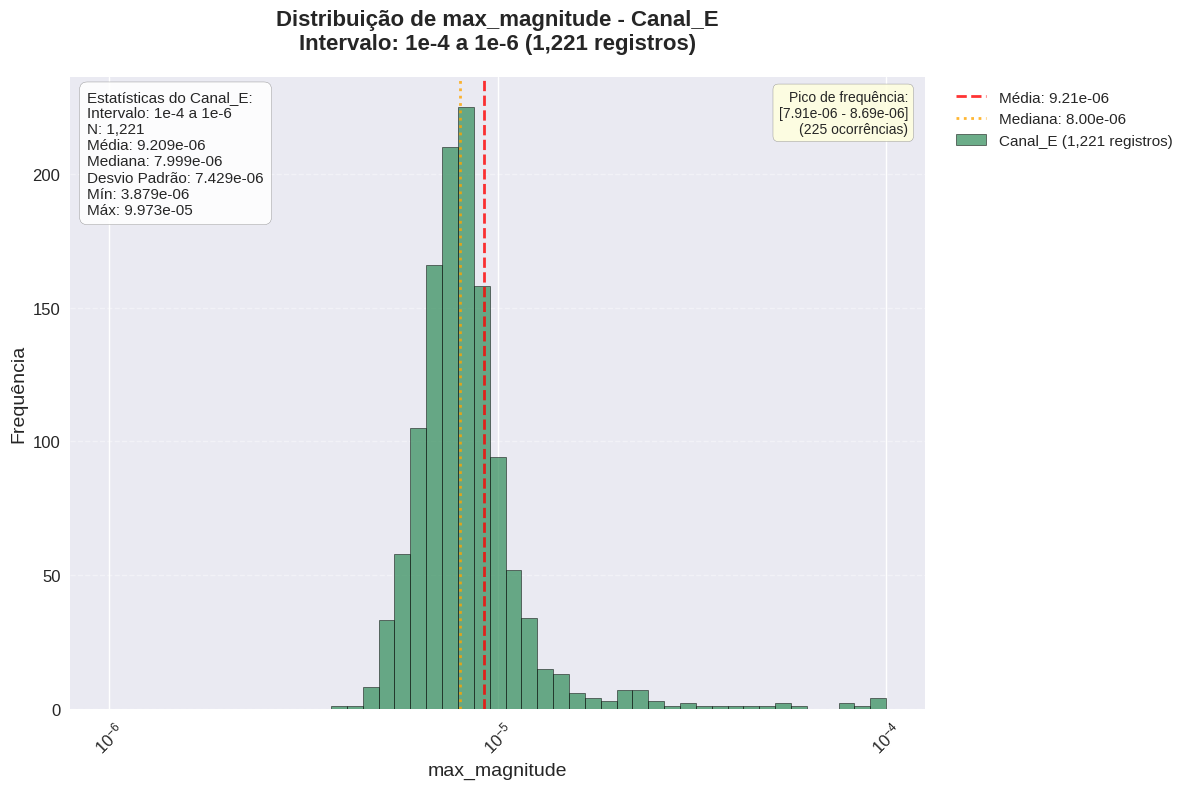


Canal_E - Estatísticas detalhadas:
----------------------------------------
  Registros no intervalo: 1,221
  Média: 9.209188e-06
  Mediana: 7.998555e-06
  Desvio Padrão: 7.429061e-06
  Mínimo: 3.879348e-06
  Máximo: 9.973046e-05
  Range: 9.585112e-05
  % do total do canal: 100.0%
  Percentis:
    P10: 6.083016e-06
    P25: 6.985301e-06
    P50: 7.998555e-06
    P75: 9.221775e-06
    P90: 1.120534e-05
    P95: 1.372357e-05
  Características da distribuição:
    Assimetria (skewness): 8.375
    Curtose (kurtosis): 82.630
  Cobertura do intervalo:
    Dados fora do intervalo: 0 (0.0%)


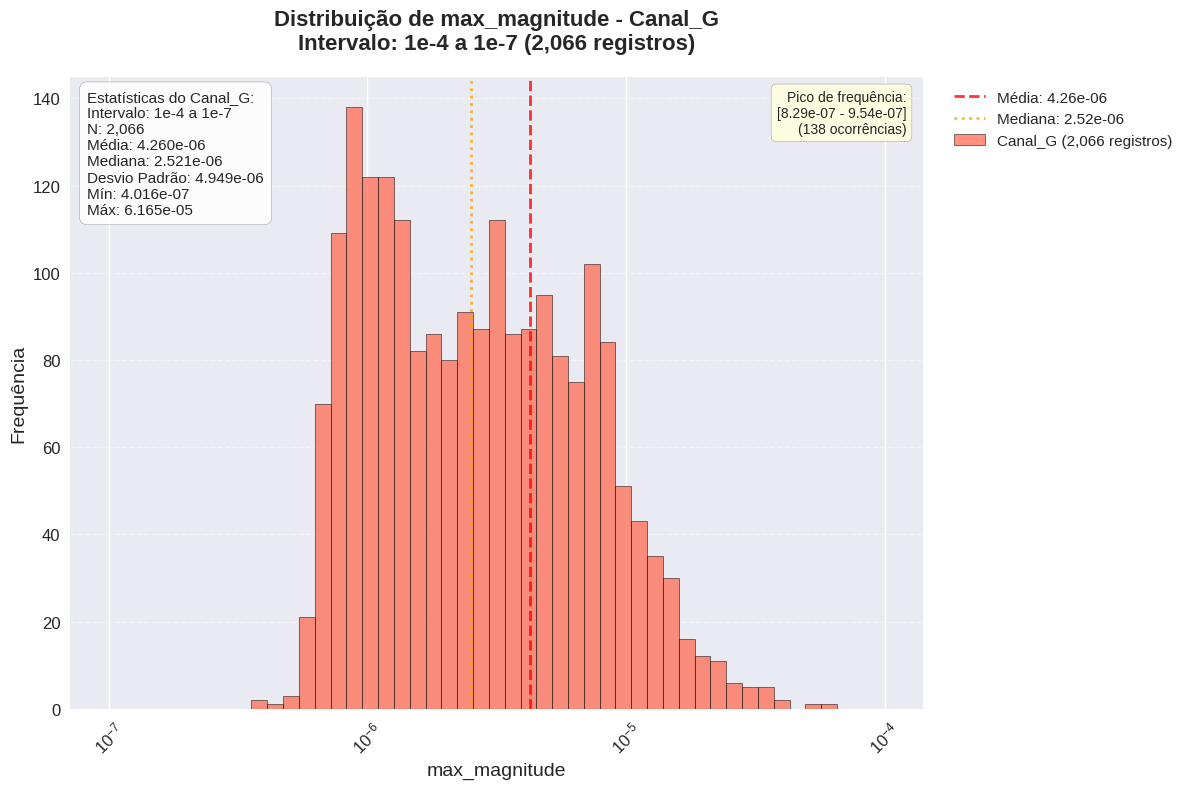


Canal_G - Estatísticas detalhadas:
----------------------------------------
  Registros no intervalo: 2,066
  Média: 4.259911e-06
  Mediana: 2.520843e-06
  Desvio Padrão: 4.948694e-06
  Mínimo: 4.015913e-07
  Máximo: 6.165096e-05
  Range: 6.124937e-05
  % do total do canal: 100.0%
  Percentis:
    P10: 8.297834e-07
    P25: 1.154536e-06
    P50: 2.520843e-06
    P75: 5.551646e-06
    P90: 9.307420e-06
    P95: 1.315949e-05
  Características da distribuição:
    Assimetria (skewness): 3.498
    Curtose (kurtosis): 20.795
  Cobertura do intervalo:
    Dados fora do intervalo: 0 (0.0%)


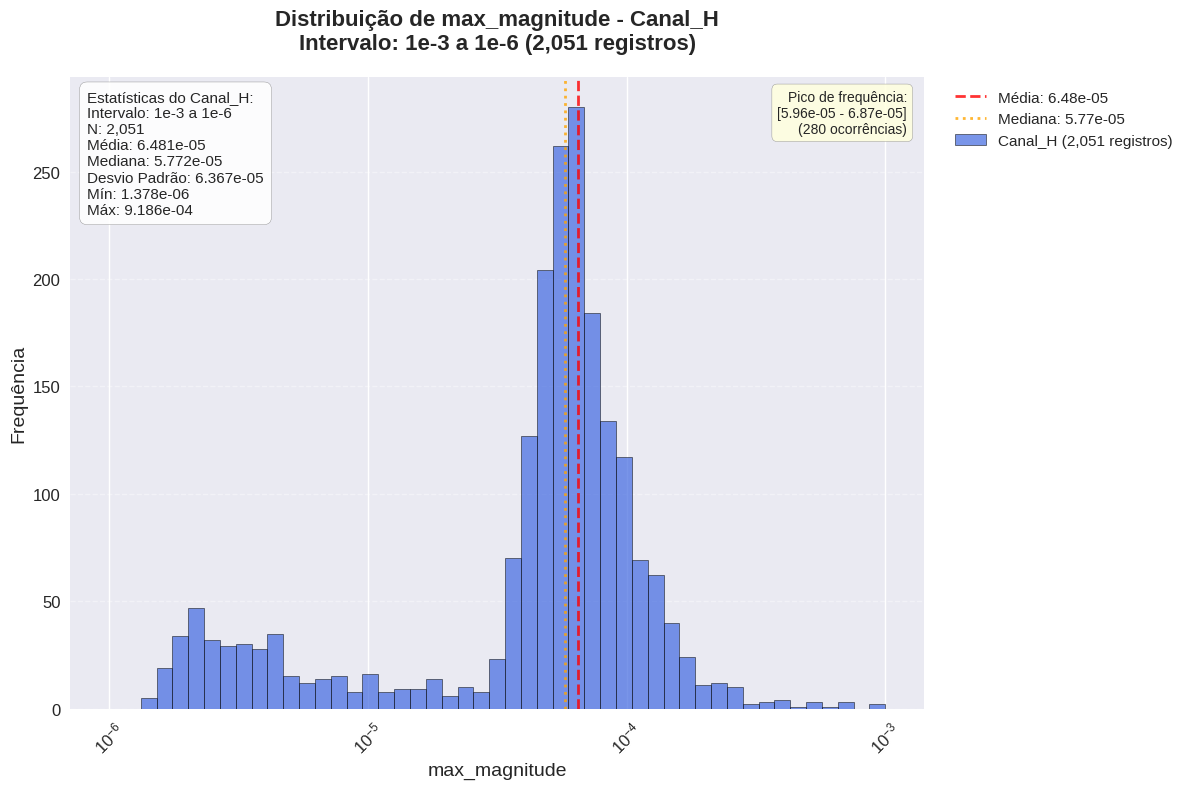


Canal_H - Estatísticas detalhadas:
----------------------------------------
  Registros no intervalo: 2,051
  Média: 6.481064e-05
  Mediana: 5.771802e-05
  Desvio Padrão: 6.366806e-05
  Mínimo: 1.378053e-06
  Máximo: 9.185563e-04
  Range: 9.171782e-04
  % do total do canal: 99.3%
  Percentis:
    P10: 3.798898e-06
    P25: 3.964552e-05
    P50: 5.771802e-05
    P75: 7.766422e-05
    P90: 1.127449e-04
    P95: 1.464047e-04
  Características da distribuição:
    Assimetria (skewness): 5.644
    Curtose (kurtosis): 55.175
  Cobertura do intervalo:
    Dados fora do intervalo: 15 (0.7%)
    Dados menores que 1.0e-06: 0
    Dados maiores que 1.0e-03: 15

RESUMO COMPARATIVO ENTRE CANAIS

Tabela comparativa com intervalos configurados:
  Canal Intervalo_Config  Registros     Média   Mediana  Desvio_Padrão  Min_Real  Max_Real  Assimetria   Curtose
Canal_E      1e-4 a 1e-6       1221 9.209e-06 7.999e-06      7.429e-06 3.879e-06 9.973e-05   8.375e+00 8.263e+01
Canal_G      1e-4 a 1e-7       206

In [85]:
import matplotlib.pyplot as plt
import numpy as np

# Obter os canais únicos no DataFrame
canais = df["canal"].unique()


# Dicionário para configurar intervalos específicos para cada canal
# Formato: {"nome_canal": {"min": valor_minimo, "max": valor_maximo, "nome": "descrição"}}
intervalos_por_canal = {
    "Canal_E": {"min": 1e-6, "max": 1e-4, "nome": "1e-4 a 1e-6"},
    "Canal_G": {"min": 1e-7, "max": 1e-4, "nome": "1e-4 a 1e-7"}, 
    "Canal_H": {"min": 1e-6, "max": 1e-3, "nome": "1e-3 a 1e-6"}
}

# Cores para cada canal
cores_canais = {canais[0]: '#2E8B57', canais[1]: '#FF6347', canais[2]: '#4169E1'}

print("ANÁLISE DE DISTRIBUIÇÃO POR CANAL COM INTERVALOS CONFIGURÁVEIS")
print("="*80)
print("Configuração atual dos intervalos:")
for canal in canais:
    config = intervalos_por_canal.get(canal, {"min": 1e-7, "max": 1e-3, "nome": "1e-3 a 1e-7"})
    print(f"  {canal}: {config['nome']} (min: {config['min']:.1e}, max: {config['max']:.1e})")
print("="*80)

# Criar gráficos separados para cada canal
for i, canal in enumerate(canais):
    # Obter configuração do intervalo para este canal
    config_intervalo = intervalos_por_canal.get(canal, {"min": 1e-7, "max": 1e-3, "nome": "1e-3 a 1e-7"})
    
    # Filtrar os dados para o canal atual e dentro do intervalo especificado
    subset = df[
        (df["canal"] == canal) & 
        (df["max_magnitude"] >= config_intervalo["min"]) & 
        (df["max_magnitude"] <= config_intervalo["max"])
    ]["max_magnitude"]
    
    if len(subset) > 0:
        # Criar figura individual para cada canal
        plt.figure(figsize=(12, 8))
        
        # Criar bins adaptativos para o intervalo
        n_bins = min(50, max(15, len(subset) // 20))  # Entre 15 e 50 bins
        
        # Usar escala logarítmica para os bins devido ao grande intervalo
        bins = np.logspace(np.log10(config_intervalo["min"]), 
                          np.log10(config_intervalo["max"]), n_bins)
        
        
        
        # Criar o histograma
        counts, bin_edges = np.histogram(subset, bins=bins)
        bin_widths = bin_edges[1:] - bin_edges[:-1]
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Plotar como gráfico de barras
        plt.bar(bin_centers, counts, width=bin_widths, 
               color=cores_canais.get(canal, '#808080'), 
               alpha=0.7, edgecolor='black', linewidth=0.5,
               label=f'{canal} ({len(subset):,} registros)')
        
        # Configurar o gráfico
        plt.title(f'Distribuição de max_magnitude - {canal}\nIntervalo: {config_intervalo["nome"]} ({len(subset):,} registros)', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('max_magnitude', fontsize=14)
        plt.ylabel('Frequência', fontsize=14)
        plt.grid(True, alpha=0.4, linestyle='--', axis='y')
        
        # Usar escala logarítmica para o eixo x
        plt.xscale('log')
        plt.yscale('linear')  # Manter escala linear no eixo y
        
        # Ajustar tamanho dos ticks
        plt.tick_params(axis='both', labelsize=12)
        plt.xticks(rotation=45)
        
        # Calcular estatísticas
        mean_val = subset.mean()
        median_val = subset.median()
        std_val = subset.std()
        
        # Adicionar linhas verticais para média e mediana
        plt.axvline(mean_val, color='red', linestyle='--', alpha=0.8, linewidth=2, 
                   label=f'Média: {mean_val:.2e}')
        plt.axvline(median_val, color='orange', linestyle=':', alpha=0.8, linewidth=2, 
                   label=f'Mediana: {median_val:.2e}')
        
        # Adicionar estatísticas como texto
        stats_text = f'Estatísticas do {canal}:\n'
        stats_text += f'Intervalo: {config_intervalo["nome"]}\n'
        stats_text += f'N: {len(subset):,}\n'
        stats_text += f'Média: {mean_val:.3e}\n'
        stats_text += f'Mediana: {median_val:.3e}\n'
        stats_text += f'Desvio Padrão: {std_val:.3e}\n'
        stats_text += f'Mín: {subset.min():.3e}\n'
        stats_text += f'Máx: {subset.max():.3e}'
        
        plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
                verticalalignment='top', fontsize=11,
                bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='gray'))
        
        # Adicionar informações sobre o pico de frequência
        max_count_idx = np.argmax(counts)
        if counts[max_count_idx] > 0:
            peak_range = f"[{bin_edges[max_count_idx]:.2e} - {bin_edges[max_count_idx+1]:.2e}]"
            peak_info = f'Pico de frequência:\n{peak_range}\n({counts[max_count_idx]} ocorrências)'
            plt.text(0.98, 0.98, peak_info, transform=plt.gca().transAxes, 
                    verticalalignment='top', horizontalalignment='right', fontsize=10,
                    bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.9, edgecolor='gray'))
        
        # Adicionar legenda
        plt.legend(loc='upper left', fontsize=11, bbox_to_anchor=(1.02, 1), ncol=1)

        
        # Ajustar layout e mostrar
        plt.tight_layout()
        plt.show()
        
        # Imprimir estatísticas detalhadas para este canal
        print(f"\n{canal} - Estatísticas detalhadas:")
        print("-" * 40)
        print(f"  Registros no intervalo: {len(subset):,}")
        print(f"  Média: {mean_val:.6e}")
        print(f"  Mediana: {median_val:.6e}")
        print(f"  Desvio Padrão: {std_val:.6e}")
        print(f"  Mínimo: {subset.min():.6e}")
        print(f"  Máximo: {subset.max():.6e}")
        print(f"  Range: {subset.max() - subset.min():.6e}")
        
        # Calcular percentual em relação ao total do canal
        total_canal = len(df[df["canal"] == canal]["max_magnitude"].dropna())
        percentual = (len(subset) / total_canal) * 100 if total_canal > 0 else 0
        print(f"  % do total do canal: {percentual:.1f}%")
        
        # Percentis importantes
        percentis = [10, 25, 50, 75, 90, 95]
        print(f"  Percentis:")
        for p in percentis:
            valor = subset.quantile(p/100)
            print(f"    P{p}: {valor:.6e}")
        
        # Análise de assimetria
        from scipy import stats
        skewness = stats.skew(subset)
        kurtosis = stats.kurtosis(subset)
        print(f"  Características da distribuição:")
        print(f"    Assimetria (skewness): {skewness:.3f}")
        print(f"    Curtose (kurtosis): {kurtosis:.3f}")
        
        # Informações sobre cobertura do intervalo
        total_canal_data = df[df["canal"] == canal]["max_magnitude"].dropna()
        if len(total_canal_data) > 0:
            fora_intervalo = len(total_canal_data) - len(subset)
            print(f"  Cobertura do intervalo:")
            print(f"    Dados fora do intervalo: {fora_intervalo} ({(fora_intervalo/len(total_canal_data)*100):.1f}%)")
            
            if fora_intervalo > 0:
                dados_menores = (total_canal_data < config_intervalo["min"]).sum()
                dados_maiores = (total_canal_data > config_intervalo["max"]).sum()
                print(f"    Dados menores que {config_intervalo['min']:.1e}: {dados_menores}")
                print(f"    Dados maiores que {config_intervalo['max']:.1e}: {dados_maiores}")
        
    else:
        print(f"\n{canal}: Sem dados no intervalo {config_intervalo['nome']}")
        print(f"  Intervalo configurado: {config_intervalo['min']:.1e} a {config_intervalo['max']:.1e}")
        
        # Verificar se existem dados fora do intervalo
        total_canal_data = df[df["canal"] == canal]["max_magnitude"].dropna()
        if len(total_canal_data) > 0:
            print(f"  Total de dados do canal: {len(total_canal_data)}")
            print(f"  Range real dos dados: {total_canal_data.min():.1e} a {total_canal_data.max():.1e}")
            print(f"  Sugestão: Ajuste o intervalo para incluir mais dados.")

# Comparação final entre canais
print(f"\n{'='*80}")
print("RESUMO COMPARATIVO ENTRE CANAIS")
print("="*80)

canal_stats = []
for canal in canais:
    config_intervalo = intervalos_por_canal.get(canal, {"min": 1e-7, "max": 1e-3, "nome": "1e-3 a 1e-7"})
    subset = df[
        (df["canal"] == canal) & 
        (df["max_magnitude"] >= config_intervalo["min"]) & 
        (df["max_magnitude"] <= config_intervalo["max"])
    ]["max_magnitude"]
    
    if len(subset) > 0:
        canal_stats.append({
            'Canal': canal,
            'Intervalo_Config': config_intervalo["nome"],
            'Registros': len(subset),
            'Média': subset.mean(),
            'Mediana': subset.median(),
            'Desvio_Padrão': subset.std(),
            'Min_Real': subset.min(),
            'Max_Real': subset.max(),
            'Assimetria': stats.skew(subset),
            'Curtose': stats.kurtosis(subset)
        })

if canal_stats:
    import pandas as pd
    comparison_df = pd.DataFrame(canal_stats)
    print("\nTabela comparativa com intervalos configurados:")
    print(comparison_df.to_string(index=False, float_format='%.3e'))
    
print(f"\n{'='*80}")
print("INSTRUÇÕES PARA MODIFICAR INTERVALOS:")
print("="*80)
print("Para alterar os intervalos, modifique o dicionário 'intervalos_por_canal' no início da célula:")
print('intervalos_por_canal = {')
for canal in canais:
    config = intervalos_por_canal.get(canal, {"min": 1e-7, "max": 1e-3, "nome": "1e-3 a 1e-7"})
    print(f'    "{canal}": {{"min": {config["min"]:.1e}, "max": {config["max"]:.1e}, "nome": "{config["nome"]}"}},')
print('}')
print("\nDepois execute novamente a célula para ver os resultados com os novos intervalos.")

Valor mínimo de max_magnitude: 4.015913e-07
Valor máximo de max_magnitude: 6.068628e-03


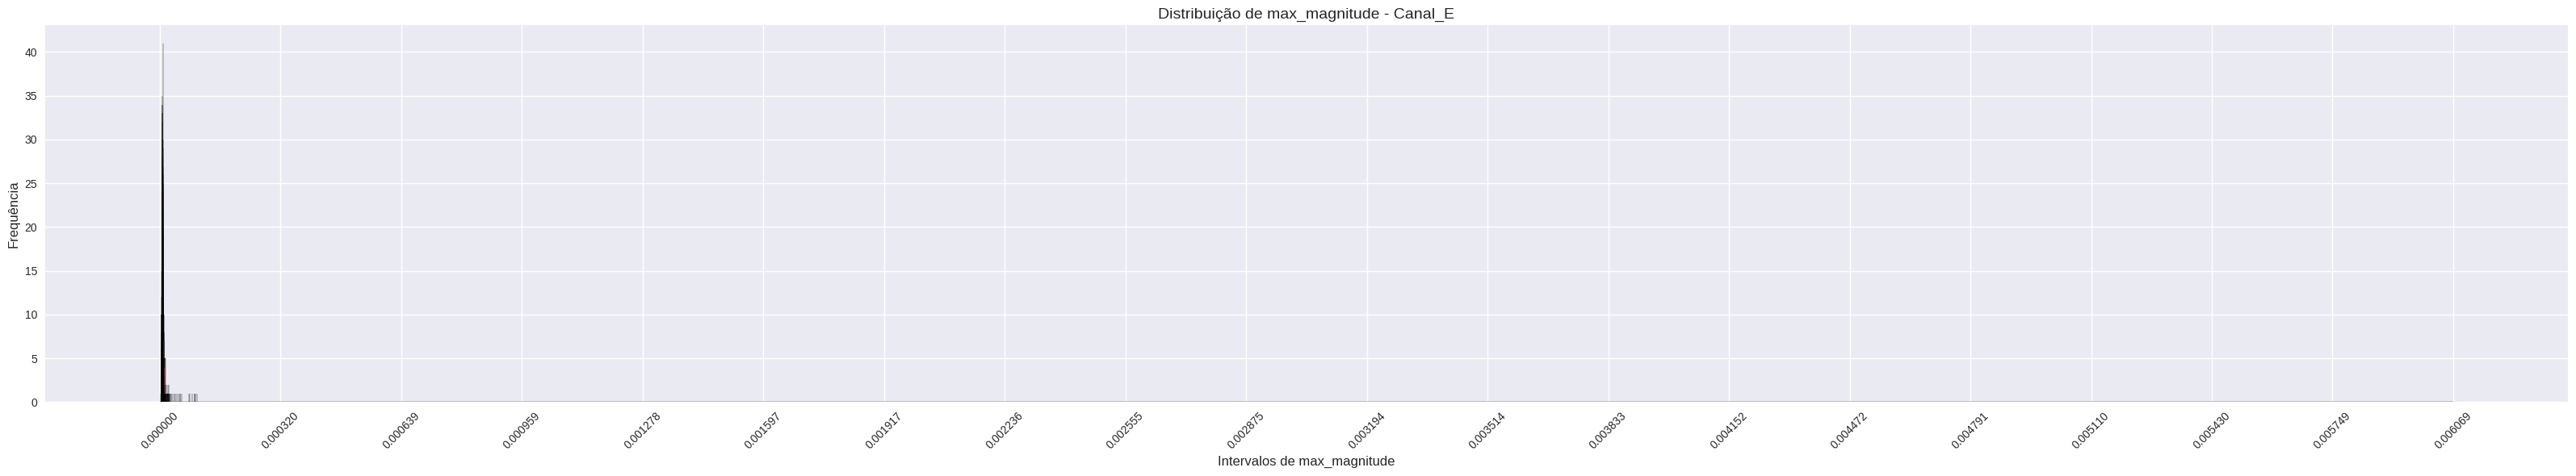

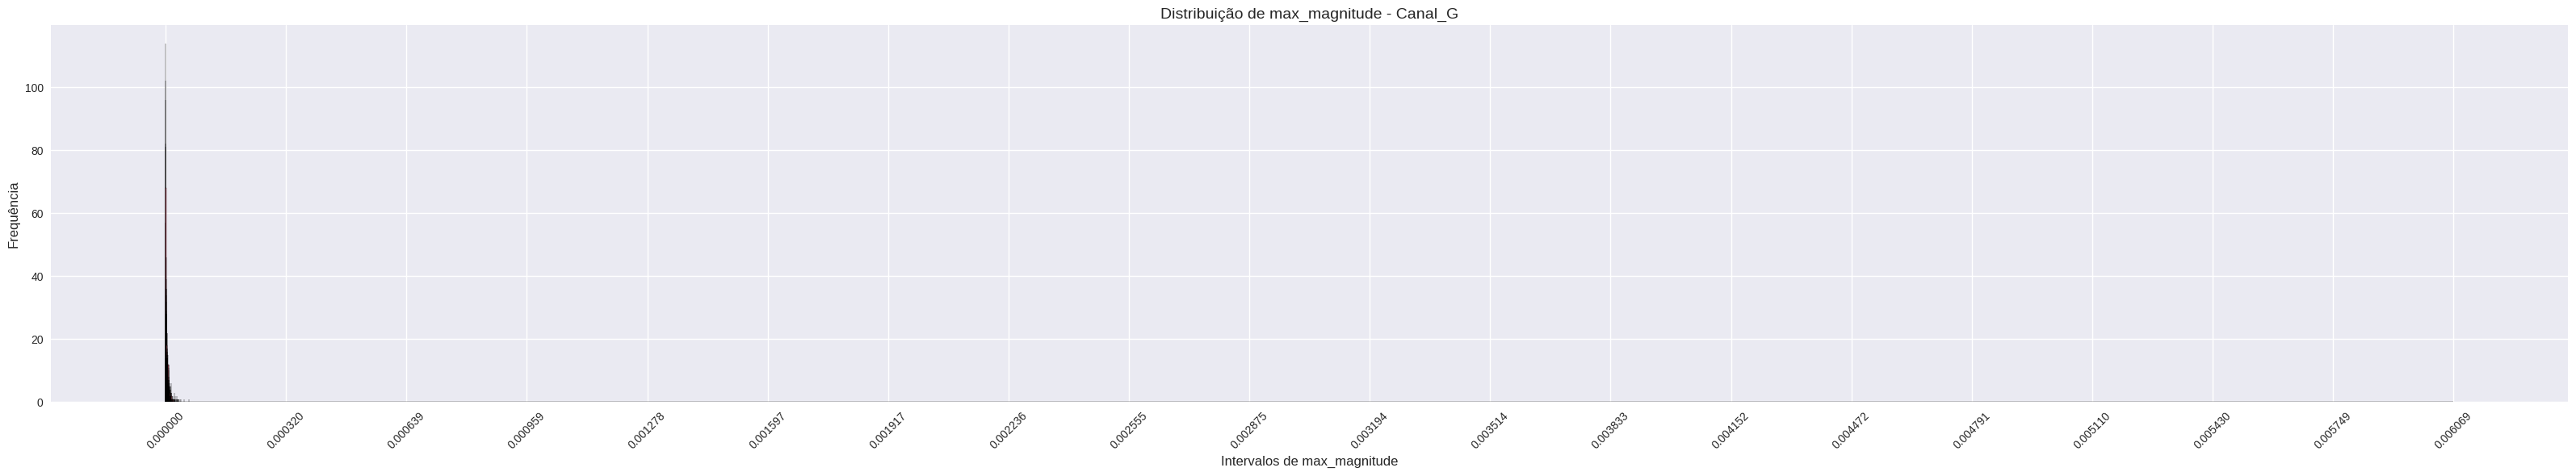

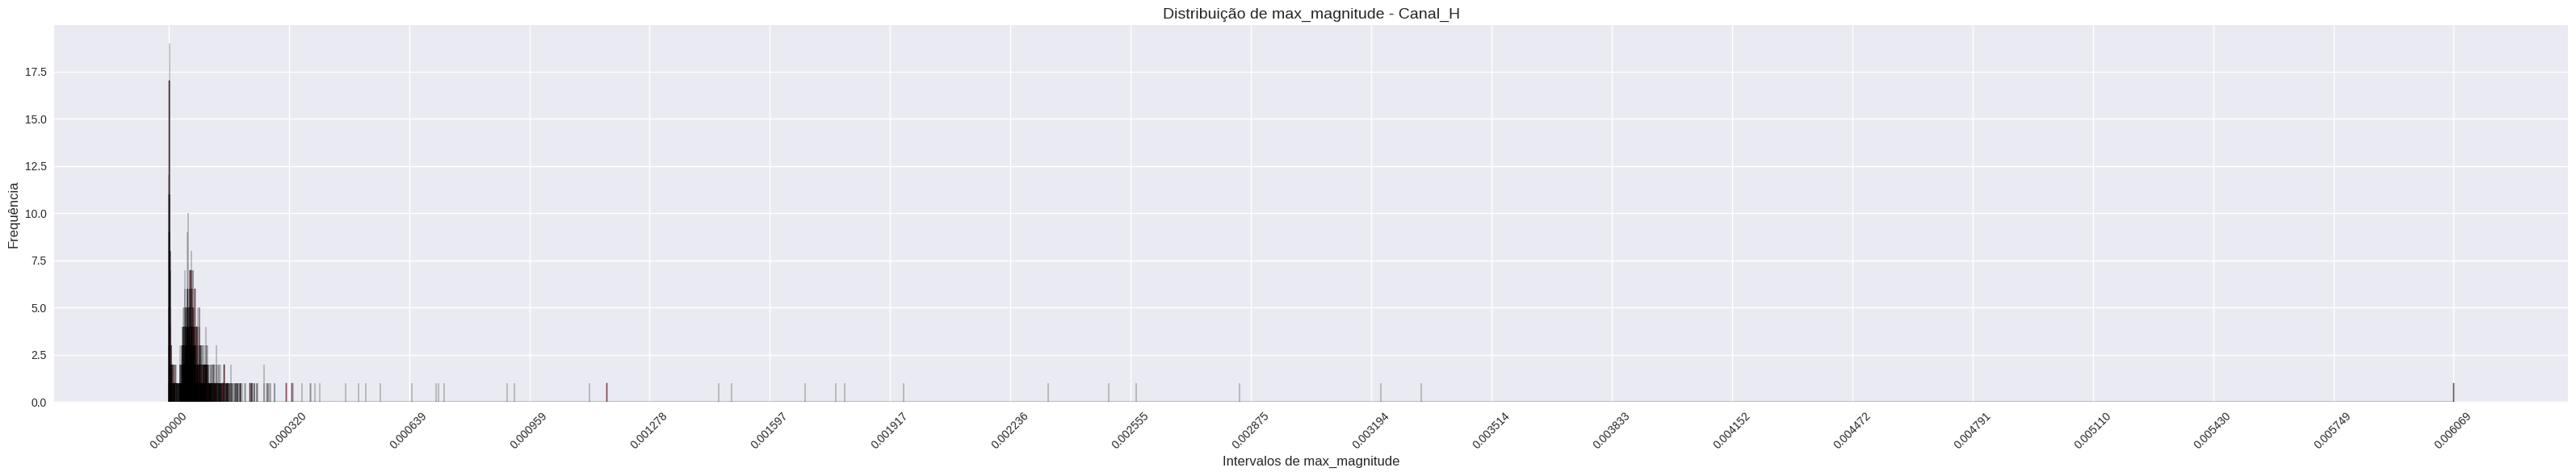

In [86]:


import matplotlib.pyplot as plt
import numpy as np

# Obter os canais únicos no DataFrame
canais = df["canal"].unique()

# Definir os bins com passos de 0.0001
min_val = df["max_magnitude"].min()
max_val = df["max_magnitude"].max()

print(f"Valor mínimo de max_magnitude: {min_val:.6e}")
print(f"Valor máximo de max_magnitude: {max_val:.6e}")

bin_width = 1e-7
bins = np.arange(min_val, max_val + bin_width, bin_width)

for canal in canais:
    # Filtrar os dados para o canal atual
    subset = df[df["canal"] == canal]["max_magnitude"]

    # Contar a frequência em cada intervalo definido
    counts, bin_edges = np.histogram(subset, bins=bins)

    # Criar o gráfico de barras
    plt.figure(figsize=(32, 6))
    plt.bar(bin_edges[:-1], counts, width=bin_width, edgecolor="black", align="edge")
    plt.title(f"Distribuição de max_magnitude - {canal}", fontsize=14)
    plt.xlabel("Intervalos de max_magnitude", fontsize=12)
    plt.ylabel("Frequência", fontsize=12)
    
    # Ajustar os rótulos do eixo x para mostrar mais valores
    xticks_positions = np.linspace(min_val, max_val, 20)  # Dividir em 20 intervalos
    plt.xticks(xticks_positions, rotation=45, fontsize=10)
    
    
    plt.tight_layout()
    plt.show()




8. Exportação dos Dados Analisados

Esta seção realiza a exportação de todos os dados analisados junto com as novas classificações e estatísticas geradas durante a análise de amplitude. Os dados originais são enriquecidos com informações sobre:

    Rankings e percentis de amplitude
    Flags de identificação de amplitudes extremas (altas e baixas)
    Classificação de eventos por nível de amplitude
    Detecção de possíveis ruídos baseada em variabilidade
    Estatísticas por evento (média, desvio padrão, contagem)

Os resultados são salvos na pasta resultados_amplitude/ com múltiplos arquivos especializados para diferentes aspectos da análise, facilitando estudos posteriores e identificação de padrões anômalos nos dados sísmicos.


In [87]:
# Preparar dados para exportação com análise de max_magnitude
if 'max_magnitude' in df.columns:
    export_df = df.copy()
    
    # Filtrar apenas registros com max_magnitude válida
    valid_amplitude_mask = export_df['max_magnitude'].notna()
    
    # Adicionar rank e percentil de amplitude
    export_df.loc[valid_amplitude_mask, 'amplitude_rank'] = export_df.loc[valid_amplitude_mask, 'max_magnitude'].rank(ascending=False)
    export_df.loc[valid_amplitude_mask, 'amplitude_percentile'] = export_df.loc[valid_amplitude_mask, 'max_magnitude'].rank(pct=True)
    
    # Adicionar flag para valores de alta amplitude (acima do percentil 95)
    high_amplitude_threshold = export_df['max_magnitude'].quantile(0.95)
    export_df['high_amplitude_flag'] = export_df['max_magnitude'] > high_amplitude_threshold
    
    # Adicionar flag para valores de baixa amplitude (abaixo do percentil 5) - possíveis ruídos
    low_amplitude_threshold = export_df['max_magnitude'].quantile(0.05)
    export_df['low_amplitude_flag'] = export_df['max_magnitude'] < low_amplitude_threshold
    
    # Flag combinado para amplitudes extremas (muito altas ou muito baixas)
    export_df['extreme_amplitude_flag'] = export_df['high_amplitude_flag'] | export_df['low_amplitude_flag']
    
    # Adicionar estatísticas por event_id para max_magnitude
    event_stats = df[df['max_magnitude'].notna()].groupby('event_id')['max_magnitude'].agg(['mean', 'std', 'count']).add_prefix('event_amplitude_')
    export_df = export_df.merge(event_stats, left_on='event_id', right_index=True, how='left')
    
    # Identificar possíveis ruídos baseado na variabilidade do evento
    high_variance_threshold = event_stats['event_amplitude_std'].quantile(0.9)
    export_df['potential_noise_event'] = export_df['event_amplitude_std'] > high_variance_threshold
    
    # Classificação de amplitude do evento
    amplitude_means = df[df['max_magnitude'].notna()].groupby('event_id')['max_magnitude'].mean()
    low_amplitude_event_threshold = amplitude_means.quantile(0.33)
    high_amplitude_event_threshold = amplitude_means.quantile(0.67)
    
    def classify_amplitude(event_id):
        if event_id in amplitude_means.index:
            mean_amplitude = amplitude_means[event_id]
            if mean_amplitude <= low_amplitude_event_threshold:
                return 'Baixa'
            elif mean_amplitude <= high_amplitude_event_threshold:
                return 'Média'
            else:
                return 'Alta'
        else:
            return 'Sem_Dados'
    
    export_df['event_amplitude_class'] = export_df['event_id'].apply(classify_amplitude)
    
    print(f"Registros com max_magnitude válida: {valid_amplitude_mask.sum()}")
    print(f"Limiar para alta amplitude individual (percentil 95): {high_amplitude_threshold:.6e}")
    print(f"Limiar para baixa amplitude individual (percentil 5): {low_amplitude_threshold:.6e}")
    print(f"Registros com alta amplitude: {export_df['high_amplitude_flag'].sum()}")
    print(f"Registros com baixa amplitude: {export_df['low_amplitude_flag'].sum()}")
    print(f"Registros com amplitude extrema (alta ou baixa): {export_df['extreme_amplitude_flag'].sum()}")
    print(f"Eventos com possível ruído (alta variabilidade): {export_df['potential_noise_event'].sum()}")
    print(f"Distribuição de classificação de amplitude por evento:")
    print(export_df['event_amplitude_class'].value_counts())

else:
    print("ERRO: Coluna 'max_magnitude' não encontrada!")
    print("Exportando dados originais sem análise de amplitude.")
    export_df = df.copy()

Registros com max_magnitude válida: 5353
Limiar para alta amplitude individual (percentil 95): 1.033373e-04
Limiar para baixa amplitude individual (percentil 5): 8.843952e-07
Registros com alta amplitude: 268
Registros com baixa amplitude: 268
Registros com amplitude extrema (alta ou baixa): 536
Eventos com possível ruído (alta variabilidade): 538
Distribuição de classificação de amplitude por evento:
event_amplitude_class
Média    1864
Baixa    1816
Alta     1673
Name: count, dtype: int64


In [88]:
# Criar um resumo final para salvar como arquivo separado
if 'max_magnitude' in df.columns:
    valid_amplitude_data = df['max_magnitude'].dropna()
    
    summary_stats = {
        'Estatística': [
            'Total de Registros',
            'Registros com Amplitude Válida',
            'Eventos Únicos', 
            'Sensores Únicos',
            'Canais Únicos',
            'Amplitude Média',
            'Amplitude Mediana',
            'Desvio Padrão',
            'Amplitude Mínima',
            'Amplitude Máxima',
            'Coeficiente de Variação',
            'Registros com Alta Amplitude',
            'Registros com Baixa Amplitude',
            'Registros com Amplitude Extrema',
            'Eventos com Possível Ruído'
        ],
        'Valor': [
            len(df),
            len(valid_amplitude_data),
            df['event_id'].nunique(),
            df['sensor'].nunique(),
            df['canal'].nunique(),
            f"{valid_amplitude_data.mean():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.median():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.std():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.min():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{valid_amplitude_data.max():.6e}" if len(valid_amplitude_data) > 0 else "N/A",
            f"{(valid_amplitude_data.std() / valid_amplitude_data.mean()):.3f}" if len(valid_amplitude_data) > 0 and valid_amplitude_data.mean() != 0 else "N/A",
            export_df['high_amplitude_flag'].sum() if 'high_amplitude_flag' in export_df.columns else 0,
            export_df['low_amplitude_flag'].sum() if 'low_amplitude_flag' in export_df.columns else 0,
            export_df['extreme_amplitude_flag'].sum() if 'extreme_amplitude_flag' in export_df.columns else 0,
            len(export_df[export_df['potential_noise_event'] == True]['event_id'].unique()) if 'potential_noise_event' in export_df.columns else 0
        ]
    }
else:
    summary_stats = {
        'Estatística': [
            'Total de Registros',
            'Eventos Únicos', 
            'Sensores Únicos',
            'Canais Únicos',
            'Status max_magnitude'
        ],
        'Valor': [
            len(df),
            df['event_id'].nunique(),
            df['sensor'].nunique(),
            df['canal'].nunique(),
            "Coluna não encontrada"
        ]
    }

summary_df = pd.DataFrame(summary_stats)
summary_path = results_dir / "eventsA001_max_magnitude_summary.csv"
summary_df.to_csv(summary_path, index=False)

print(f"Resumo estatístico salvo em: {summary_path}")
display(summary_df)

# Criar relatório específico de possíveis ruídos (apenas se max_magnitude existe)
if 'max_magnitude' in df.columns and 'potential_noise_event' in export_df.columns:
    noise_events = export_df[export_df['potential_noise_event'] == True]['event_id'].unique()
    
    if len(noise_events) > 0:
        noise_report = df[df['event_id'].isin(noise_events) & df['max_magnitude'].notna()].groupby('event_id').agg({
            'max_magnitude': ['count', 'mean', 'std', 'min', 'max'],
            'sensor': 'nunique',
            'canal': 'nunique'
        }).round(8)
        
        noise_report.columns = ['registros', 'amplitude_media', 'desvio_padrao', 'amplitude_min', 'amplitude_max', 'sensores', 'canais']
        noise_report_path = results_dir / "eventos_possiveis_ruidos_amplitude.csv"
        noise_report.to_csv(noise_report_path)
        
        print(f"\nRelatório de possíveis ruídos salvo em: {noise_report_path}")
        print(f"Eventos identificados como possível ruído: {len(noise_events)}")
        print("\nTop 10 eventos com maior variabilidade de amplitude:")
        display(noise_report.sort_values('desvio_padrao', ascending=False).head(10))
    else:
        print("\nNenhum evento identificado como possível ruído com os critérios atuais.")

# Criar relatório específico de amplitudes extremas (muito baixas e muito altas)
if 'max_magnitude' in df.columns and 'extreme_amplitude_flag' in export_df.columns:
    extreme_amplitudes = export_df[export_df['extreme_amplitude_flag'] == True]
    
    if len(extreme_amplitudes) > 0:
        # Separar amplitudes baixas e altas
        low_amplitudes = extreme_amplitudes[extreme_amplitudes['low_amplitude_flag'] == True]
        high_amplitudes = extreme_amplitudes[extreme_amplitudes['high_amplitude_flag'] == True]
        
        extreme_report = {
            'Tipo_Extremo': ['Amplitude_Baixa', 'Amplitude_Alta', 'Total_Extremos'],
            'Quantidade_Registros': [len(low_amplitudes), len(high_amplitudes), len(extreme_amplitudes)],
            'Eventos_Únicos': [
                low_amplitudes['event_id'].nunique() if len(low_amplitudes) > 0 else 0,
                high_amplitudes['event_id'].nunique() if len(high_amplitudes) > 0 else 0,
                extreme_amplitudes['event_id'].nunique()
            ],
            'Percentual_Total': [
                (len(low_amplitudes) / len(export_df)) * 100,
                (len(high_amplitudes) / len(export_df)) * 100,
                (len(extreme_amplitudes) / len(export_df)) * 100
            ]
        }
        
        extreme_df = pd.DataFrame(extreme_report)
        extreme_path = results_dir / "amplitudes_extremas_report.csv"
        extreme_df.to_csv(extreme_path, index=False)
        
        print(f"\nRelatório de amplitudes extremas salvo em: {extreme_path}")
        display(extreme_df.round(2))
        
        # Mostrar alguns exemplos de cada tipo
        if len(low_amplitudes) > 0:
            print("\nExemplos de registros com amplitude muito baixa:")
            display(low_amplitudes[['event_id', 'sensor', 'canal', 'max_magnitude']].head())
        
        if len(high_amplitudes) > 0:
            print("\nExemplos de registros com amplitude muito alta:")
            display(high_amplitudes[['event_id', 'sensor', 'canal', 'max_magnitude']].head())

# Criar análise de frequência por canal
if 'max_magnitude' in df.columns:
    frequency_analysis = []
    
    for canal in df['canal'].unique():
        canal_data = df[df['canal'] == canal]['max_magnitude'].dropna()
        
        if len(canal_data) > 0:
            # Criar intervalos de frequência
            q1 = canal_data.quantile(0.25)
            q2 = canal_data.quantile(0.50)
            q3 = canal_data.quantile(0.75)
            
            # Contar frequências por quartil
            count_q1 = (canal_data <= q1).sum()
            count_q2 = ((canal_data > q1) & (canal_data <= q2)).sum()
            count_q3 = ((canal_data > q2) & (canal_data <= q3)).sum()
            count_q4 = (canal_data > q3).sum()
            
            frequency_analysis.extend([
                {'Canal': canal, 'Intervalo': 'Q1', 'Range_Min': canal_data.min(), 'Range_Max': q1, 'Frequencia': count_q1, 'Percentual': count_q1/len(canal_data)*100},
                {'Canal': canal, 'Intervalo': 'Q2', 'Range_Min': q1, 'Range_Max': q2, 'Frequencia': count_q2, 'Percentual': count_q2/len(canal_data)*100},
                {'Canal': canal, 'Intervalo': 'Q3', 'Range_Min': q2, 'Range_Max': q3, 'Frequencia': count_q3, 'Percentual': count_q3/len(canal_data)*100},
                {'Canal': canal, 'Intervalo': 'Q4', 'Range_Min': q3, 'Range_Max': canal_data.max(), 'Frequencia': count_q4, 'Percentual': count_q4/len(canal_data)*100}
            ])
    
    if frequency_analysis:
        frequency_df = pd.DataFrame(frequency_analysis)
        frequency_path = results_dir / "analise_frequencia_amplitude_por_canal.csv"
        frequency_df.to_csv(frequency_path, index=False)
        
        print(f"\nAnálise de frequência por canal salva em: {frequency_path}")
        display(frequency_df.round(6))

Resumo estatístico salvo em: resultados_amplitude/eventsA001_max_magnitude_summary.csv


,Estatística,Valor
0,Total de Registros,5353
1,Registros com Amplitude Válida,5353
2,Eventos Únicos,2070
3,Sensores Únicos,16
4,Canais Únicos,3
5,Amplitude Média,3.517339e-05
6,Amplitude Mediana,7.958173e-06
7,Desvio Padrão,1.467234e-04
8,Amplitude Mínima,4.015913e-07
9,Amplitude Máxima,6.068628e-03



Relatório de possíveis ruídos salvo em: resultados_amplitude/eventos_possiveis_ruidos_amplitude.csv
Eventos identificados como possível ruído: 207

Top 10 eventos com maior variabilidade de amplitude:


,registros,amplitude_media,desvio_padrao,amplitude_min,amplitude_max,sensores,canais
event_id,,,,,,,
208196,3,0.002056,0.003475,0.000021,0.006069,3,3
206057,3,0.001133,0.001900,0.000019,0.003326,3,3
207637,3,0.001105,0.001832,0.000019,0.003220,3,3
206105,2,0.001303,0.001793,0.000034,0.002571,2,2
206343,2,0.001255,0.001756,0.000014,0.002496,2,2
206480,3,0.000972,0.001621,0.000016,0.002844,3,3
206920,3,0.000819,0.001314,0.000030,0.002336,3,3
208994,3,0.000675,0.001107,0.000015,0.001953,3,3
205726,3,0.000610,0.001027,0.000008,0.001796,3,3



Relatório de amplitudes extremas salvo em: resultados_amplitude/amplitudes_extremas_report.csv


,Tipo_Extremo,Quantidade_Registros,Eventos_Únicos,Percentual_Total
0,Amplitude_Baixa,268,268,5.01
1,Amplitude_Alta,268,268,5.01
2,Total_Extremos,536,495,10.01



Exemplos de registros com amplitude muito baixa:


,event_id,sensor,canal,max_magnitude
39,71468,BR.ESM04,Canal_G,8.582466e-07
60,71500,BR.ESM04,Canal_G,7.746618e-07
83,71652,BR.ESM09,Canal_G,8.293180e-07
95,71824,BR.ESM09,Canal_G,7.656122e-07
310,194869,BR.ESM04,Canal_G,7.098048e-07



Exemplos de registros com amplitude muito alta:


,event_id,sensor,canal,max_magnitude
108,194165,BR.ESM05,Canal_H,0.000156
111,194215,BR.ESM01,Canal_H,0.000188
120,194327,BR.ESM05,Canal_H,0.000156
133,194501,BR.ESM01,Canal_H,0.000110
145,194527,BR.ESM01,Canal_H,0.000163



Análise de frequência por canal salva em: resultados_amplitude/analise_frequencia_amplitude_por_canal.csv


,Canal,Intervalo,Range_Min,Range_Max,Frequencia,Percentual
0,Canal_E,Q1,0.000004,0.000007,306,25.061425
1,Canal_E,Q2,0.000007,0.000008,305,24.979525
2,Canal_E,Q3,0.000008,0.000009,305,24.979525
3,Canal_E,Q4,0.000009,0.000100,305,24.979525
4,Canal_G,Q1,0.000000,0.000001,517,25.024201
5,Canal_G,Q2,0.000001,0.000003,516,24.975799
6,Canal_G,Q3,0.000003,0.000006,516,24.975799
7,Canal_G,Q4,0.000006,0.000062,517,25.024201
8,Canal_H,Q1,0.000001,0.000040,517,25.024201
9,Canal_H,Q2,0.000040,0.000058,516,24.975799
